In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve


from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Features/Data 2/Train/combined_data.csv')
df.head()

,SampleName,label,A,C,D,E,F,G,H,I,...,YM_DPC,YN_DPC,YP_DPC,YQ_DPC,YR_DPC,YS_DPC,YT_DPC,YV_DPC,YW_DPC,YY_DPC
0,IKDNFIRF,1,0.000000,0.000000,0.125,0.000000,0.250000,0.000000,0.000000,0.25,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,QERRAMGFVGMR,1,0.083333,0.000000,0.000,0.083333,0.083333,0.166667,0.000000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,APVSTGAGGGTVLAKMYPRGSHWAVGHLM,1,0.137931,0.000000,0.000,0.000000,0.000000,0.206897,0.068966,0.00,...,0.0,0.0,0.035714,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,MRCYFLTGLAKLQS,0,0.071429,0.071429,0.000,0.000000,0.071429,0.071429,0.000000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,SYSMEHFRWGKPVGRKRRPVKVYTSNGVEEESAEVFPGEM,1,0.025000,0.000000,0.000,0.150000,0.050000,0.100000,0.025000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.025641,0.025641,0.0,0.0,0.0


In [6]:
df.shape

(13188, 1017)

In [7]:
# Checking for duplicate rows
df.duplicated().sum()

5185

In [8]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(8003, 1017)

In [5]:
df2 = df.copy()

# check the min and max length of the sequences
df2['length'] = df2['SampleName'].apply(lambda x: len(x))
print('Max length:', df2['length'].max())
print('Min length:', df2['length'].min())

Max length: 99
Min length: 6


In [10]:
df['label'].value_counts()

label
0    4019
1    3984
Name: count, dtype: int64

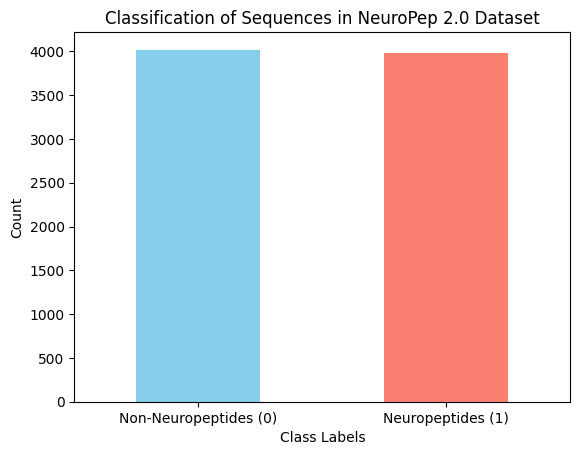

In [11]:
import matplotlib.pyplot as plt

# Plotting the value counts for the 'label' column
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

# Adding a title and labels
plt.title('Classification of Sequences in NeuroPep 2.0 Dataset')
plt.xlabel('Class Labels')
plt.ylabel('Count')

# Setting custom x-axis tick labels with horizontal orientation
plt.xticks(ticks=[0, 1], labels=['Non-Neuropeptides (0)', 'Neuropeptides (1)'], rotation=0)

# Show the plot
plt.show()

In [12]:
# Checking for missing values
df.isnull().sum()

SampleName    0
label         0
A             0
C             0
D             0
             ..
YS_DPC        0
YT_DPC        0
YV_DPC        0
YW_DPC        0
YY_DPC        0
Length: 1017, dtype: int64

In [13]:
# print the columns with Nan values
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print(nan_cols)

[]


In [14]:
# checking column distribution
df.describe()

,label,A,C,D,E,F,G,H,I,K,...,YM_DPC,YN_DPC,YP_DPC,YQ_DPC,YR_DPC,YS_DPC,YT_DPC,YV_DPC,YW_DPC,YY_DPC
count,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,...,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000
mean,0.497813,0.064818,0.025003,0.044479,0.046122,0.061330,0.079256,0.022497,0.044674,0.048706,...,0.000631,0.001513,0.001827,0.001086,0.001501,0.003480,0.001256,0.001515,0.000450,0.001107
std,0.500026,0.068911,0.051578,0.056373,0.061856,0.068261,0.081311,0.040355,0.056081,0.061798,...,0.007458,0.010818,0.012032,0.008145,0.009970,0.017567,0.009220,0.010250,0.005369,0.009267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.055556,0.000000,0.025641,0.020202,0.050000,0.064516,0.000000,0.025641,0.027778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.104957,0.022727,0.076923,0.076923,0.100000,0.116279,0.035191,0.076923,0.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.571429,0.400000,0.500000,0.583333,0.750000,0.833333,0.444444,0.375000,0.611111,...,0.200000,0.200000,0.200000,0.142857,0.166667,0.200000,0.222222,0.200000,0.142857,0.222222


In [15]:
# print the data types
df.dtypes

SampleName     object
label           int64
A             float64
C             float64
D             float64
               ...   
YS_DPC        float64
YT_DPC        float64
YV_DPC        float64
YW_DPC        float64
YY_DPC        float64
Length: 1017, dtype: object

# Model Building

In [16]:
X = df.drop(['SampleName','label'], axis=1)
y = df['label']


# standardising the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [146]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [19]:
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
mathews_lr = matthews_corrcoef(y_test, y_pred)
roc_auc_lr = roc_auc_score(y_test, y_pred)
conf_matrix_lr = confusion_matrix(y_test, y_pred)

In [20]:
print('Accuracy:', accuracy_lr)
print('Precision:', precision_lr)
print('Recall:', recall_lr)
print('F1 Score:', f1_lr)
print('Mathews Correlation Coefficient:', mathews_lr)
print('ROC AUC Score:', roc_auc_lr)

Accuracy: 0.8813241723922548
Precision: 0.8773466833541927
Recall: 0.8839848675914249
F1 Score: 0.8806532663316582
Mathews Correlation Coefficient: 0.762665601960512
ROC AUC Score: 0.8813488694392767


In [21]:
classificationReport_lr = classification_report(y_test, y_pred)
print(classificationReport_lr)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       808
           1       0.88      0.88      0.88       793

    accuracy                           0.88      1601
   macro avg       0.88      0.88      0.88      1601
weighted avg       0.88      0.88      0.88      1601



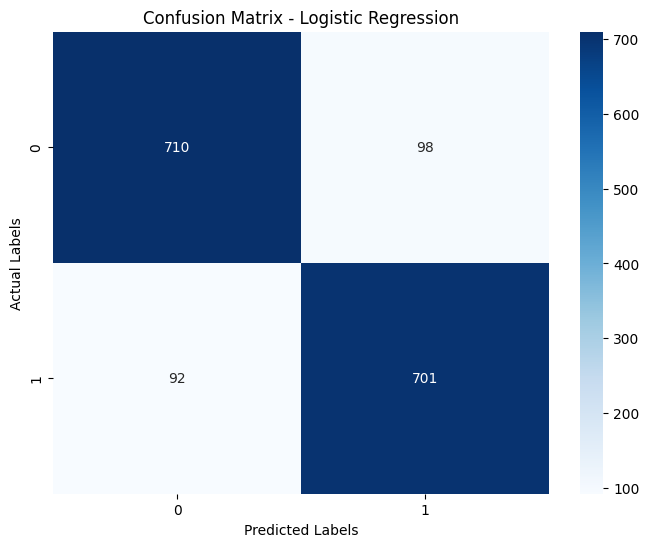

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

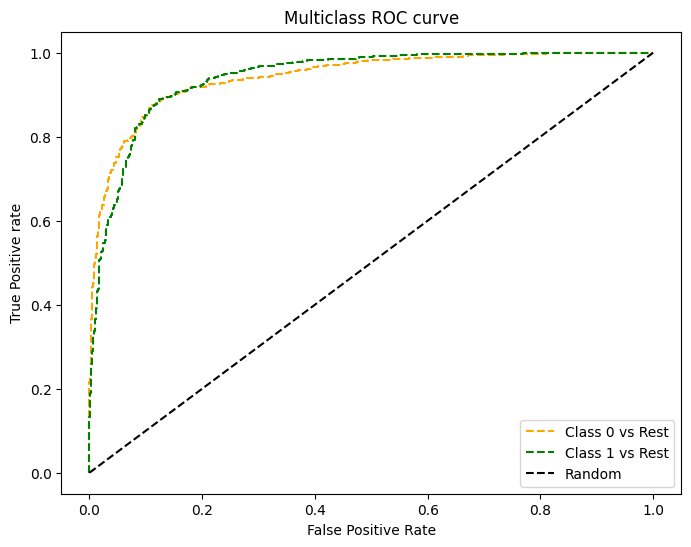

In [150]:
y_pred_proba = lr.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

# SVM

In [169]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [24]:
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
mathews_svm = matthews_corrcoef(y_test, y_pred)
roc_auc_svm = roc_auc_score(y_test, y_pred)
conf_matrix_svm = confusion_matrix(y_test, y_pred)

In [25]:
print('Accuracy:', accuracy_svm)
print('Precision:', precision_svm)
print('Recall:', recall_svm)
print('F1 Score:', f1_svm)
print('Mathews Correlation Coefficient:', mathews_svm)
print('ROC AUC Score:', roc_auc_svm)

Accuracy: 0.8969394128669581
Precision: 0.8738095238095238
Recall: 0.9255989911727617
F1 Score: 0.8989589712186161
Mathews Correlation Coefficient: 0.7953448658543785
ROC AUC Score: 0.8972054361804402


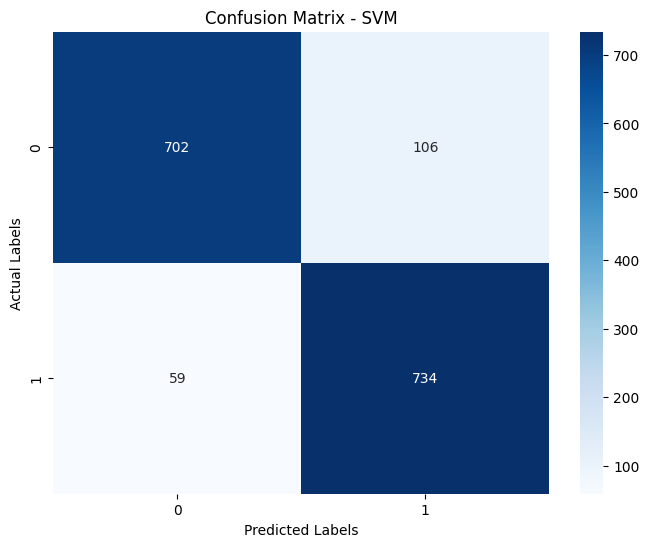

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - SVM')
plt.show()

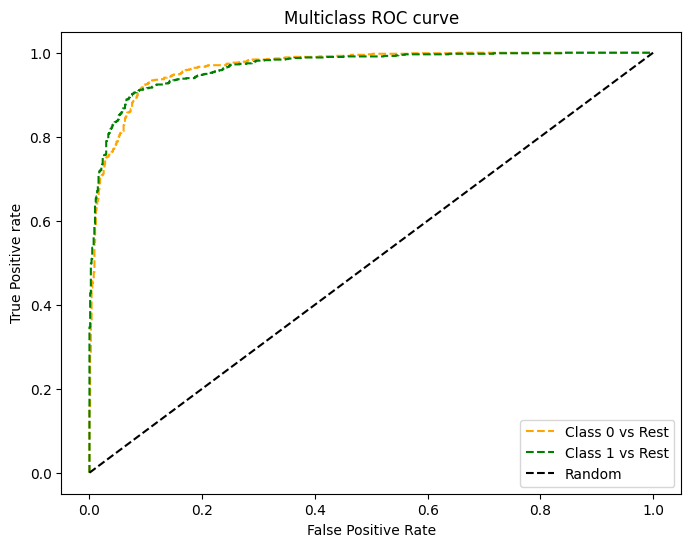

In [170]:
y_pred_proba = svm.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

# KNN

In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [28]:
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
mathews_knn = matthews_corrcoef(y_test, y_pred)
roc_auc_knn = roc_auc_score(y_test, y_pred)
conf_matrix_knn = confusion_matrix(y_test, y_pred)

In [29]:
print('Accuracy:', accuracy_knn)
print('Precision:', precision_knn)
print('Recall:', recall_knn)
print('F1 Score:', f1_knn)
print('Mathews Correlation Coefficient:', mathews_knn)
print('ROC AUC Score:', roc_auc_knn)

Accuracy: 0.8169893816364772
Precision: 0.7741228070175439
Recall: 0.8902900378310215
F1 Score: 0.8281524926686218
Mathews Correlation Coefficient: 0.6415656894377993
ROC AUC Score: 0.8176697713907582


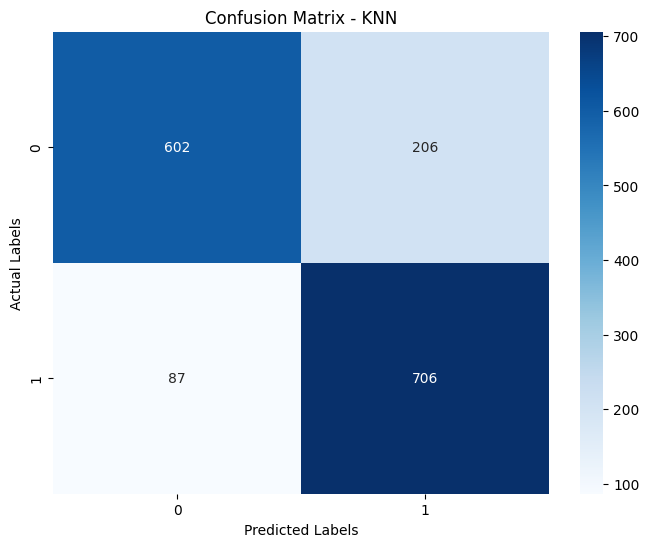

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - KNN')
plt.show()

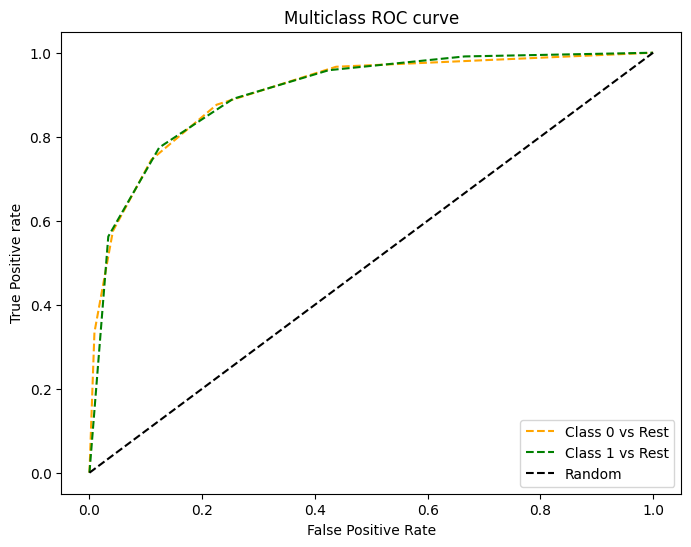

In [152]:
y_pred_proba = knn.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

# Naive Bayes

In [31]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [32]:
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)
mathews_nb = matthews_corrcoef(y_test, y_pred)
roc_auc_nb = roc_auc_score(y_test, y_pred)
conf_matrix_nb = confusion_matrix(y_test, y_pred)

In [33]:
print('Accuracy:', accuracy_nb)
print('Precision:', precision_nb)
print('Recall:', recall_nb)
print('F1 Score:', f1_nb)
print('Mathews Correlation Coefficient:', mathews_nb)
print('ROC AUC Score:', roc_auc_nb)

Accuracy: 0.7626483447845097
Precision: 0.8143074581430746
Recall: 0.6746532156368222
F1 Score: 0.7379310344827588
Mathews Correlation Coefficient: 0.5322621430797024
ROC AUC Score: 0.7618315583134607


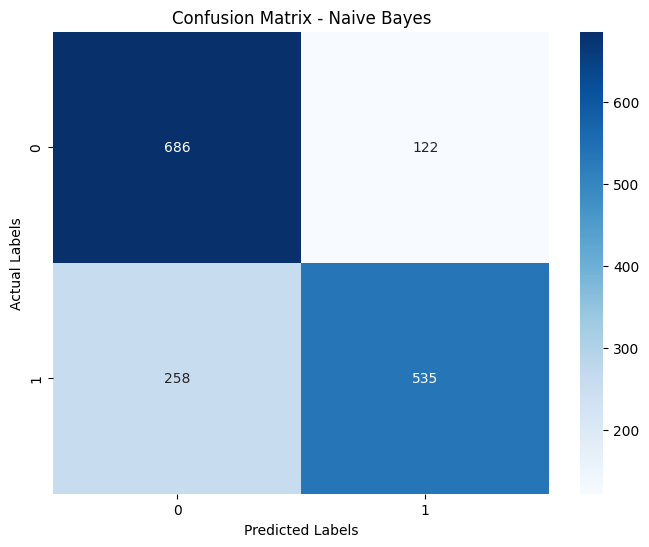

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

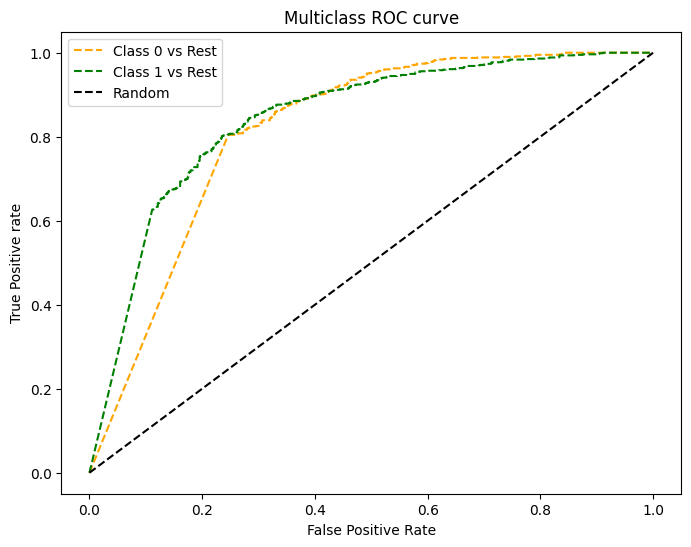

In [153]:
y_pred_proba = nb.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

# Decision Tree

In [35]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [36]:
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
mathews_dt = matthews_corrcoef(y_test, y_pred)
roc_auc_dt = roc_auc_score(y_test, y_pred)
conf_matrix_dt = confusion_matrix(y_test, y_pred)

In [37]:
print('Accuracy:', accuracy_dt)
print('Precision:', precision_dt)
print('Recall:', recall_dt)
print('F1 Score:', f1_dt)
print('Mathews Correlation Coefficient:', mathews_dt)
print('ROC AUC Score:', roc_auc_dt)

Accuracy: 0.8425983760149907
Precision: 0.8385481852315394
Recall: 0.8448928121059268
F1 Score: 0.8417085427135678
Mathews Correlation Coefficient: 0.685210473616595
ROC AUC Score: 0.842619673379696


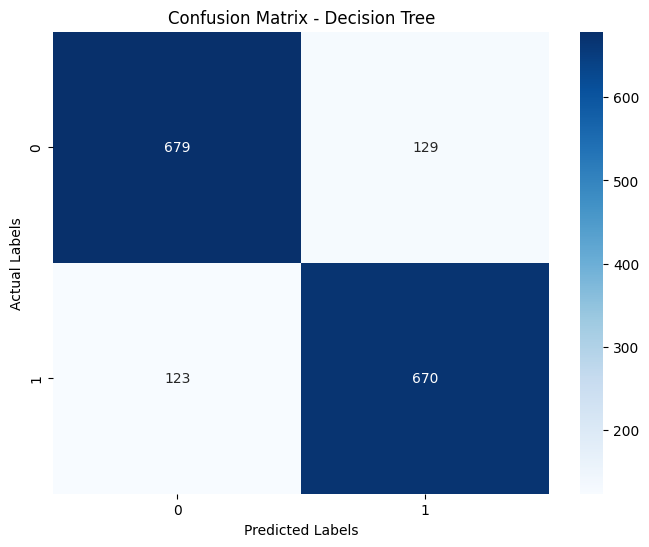

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

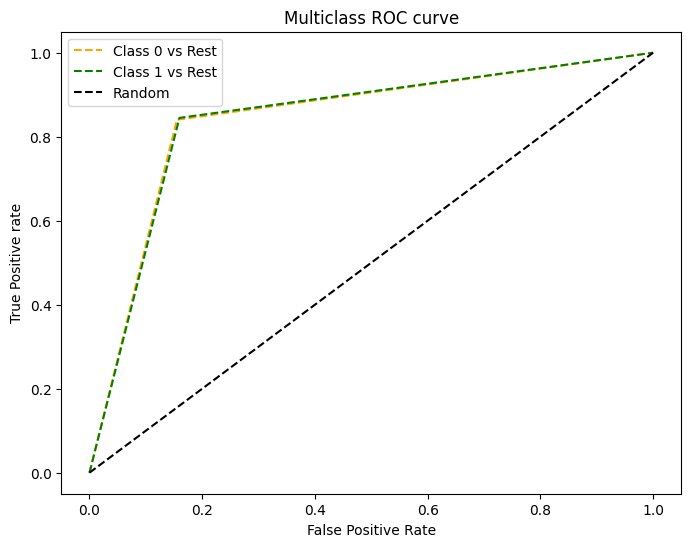

In [154]:
y_pred_proba = dt.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

# Random Forest

In [39]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [40]:
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
mathews_rf = matthews_corrcoef(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)

In [41]:
print('Accuracy:', accuracy_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1 Score:', f1_rf)
print('Mathews Correlation Coefficient:', mathews_rf)
print('ROC AUC Score:', roc_auc_rf)

Accuracy: 0.89631480324797
Precision: 0.8632676709154113
Recall: 0.9394703656998739
F1 Score: 0.8997584541062801
Mathews Correlation Coefficient: 0.795825277886683
ROC AUC Score: 0.8967153808697389


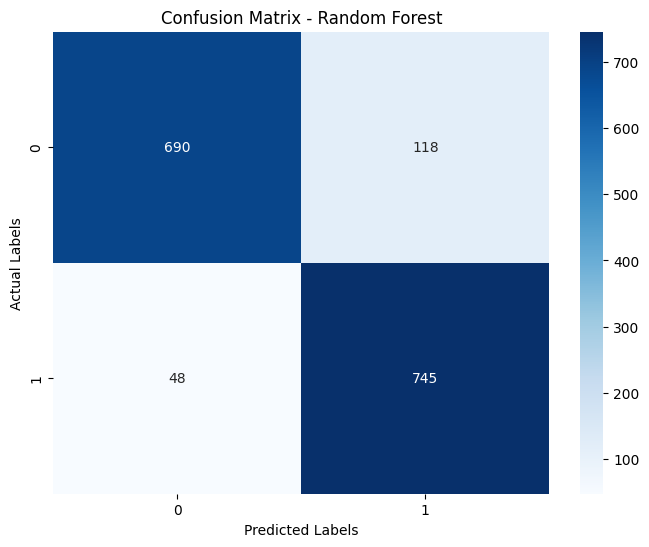

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

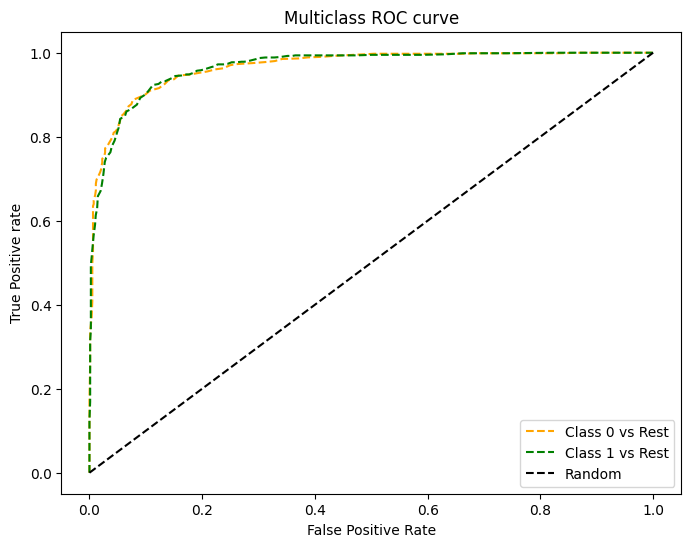

In [155]:
y_pred_proba = rf.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

# XGBoost

In [43]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [44]:
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
mathews_xgb = matthews_corrcoef(y_test, y_pred)
roc_auc_xgb = roc_auc_score(y_test, y_pred)
conf_matrix_xgb = confusion_matrix(y_test, y_pred)

In [45]:
print('Accuracy:', accuracy_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1 Score:', f1_xgb)
print('Mathews Correlation Coefficient:', mathews_xgb)
print('ROC AUC Score:', roc_auc_xgb)

Accuracy: 0.9144284821986258
Precision: 0.9
Recall: 0.9306431273644389
F1 Score: 0.9150650960942344
Mathews Correlation Coefficient: 0.8293676952976827
ROC AUC Score: 0.9145789894247937


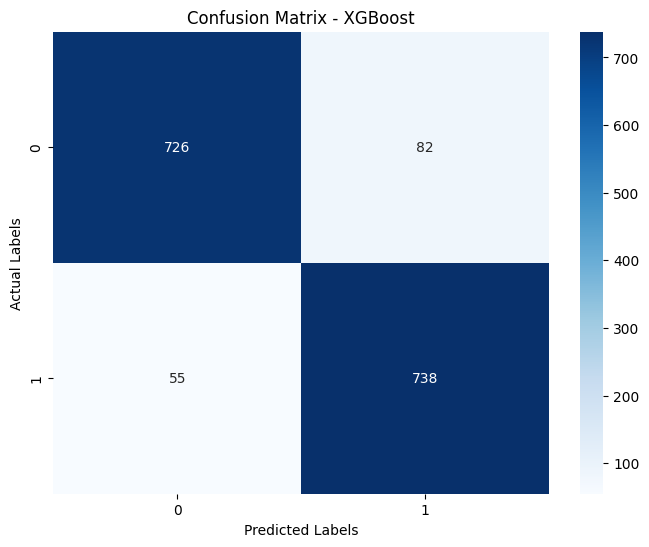

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()

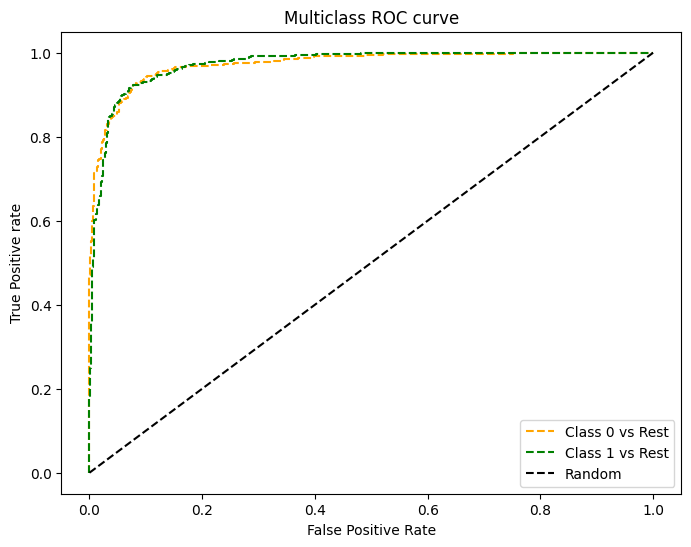

In [156]:
y_pred_proba = xgb.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

# CatBoost

In [47]:
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

In [48]:
accuracy_cat = accuracy_score(y_test, y_pred)
precision_cat = precision_score(y_test, y_pred)
recall_cat = recall_score(y_test, y_pred)
f1_cat = f1_score(y_test, y_pred)
mathews_cat = matthews_corrcoef(y_test, y_pred)
roc_auc_cat = roc_auc_score(y_test, y_pred)
conf_matrix_cat = confusion_matrix(y_test, y_pred)

In [49]:
print('Accuracy:', accuracy_cat)
print('Precision:', precision_cat)
print('Recall:', recall_cat)
print('F1 Score:', f1_cat)
print('Mathews Correlation Coefficient:', mathews_cat)
print('ROC AUC Score:', roc_auc_cat)

Accuracy: 0.9106808244846971
Precision: 0.892512077294686
Recall: 0.9319041614123581
F1 Score: 0.9117828500925353
Mathews Correlation Coefficient: 0.8222048904879982
ROC AUC Score: 0.9108778232804364


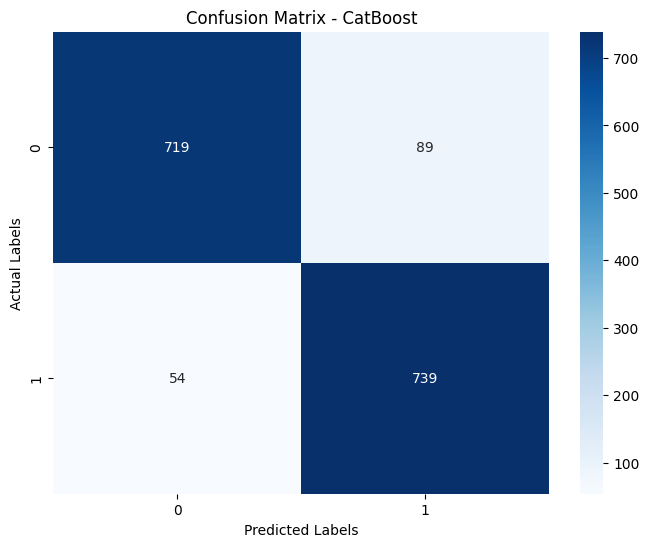

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CatBoost')
plt.show()

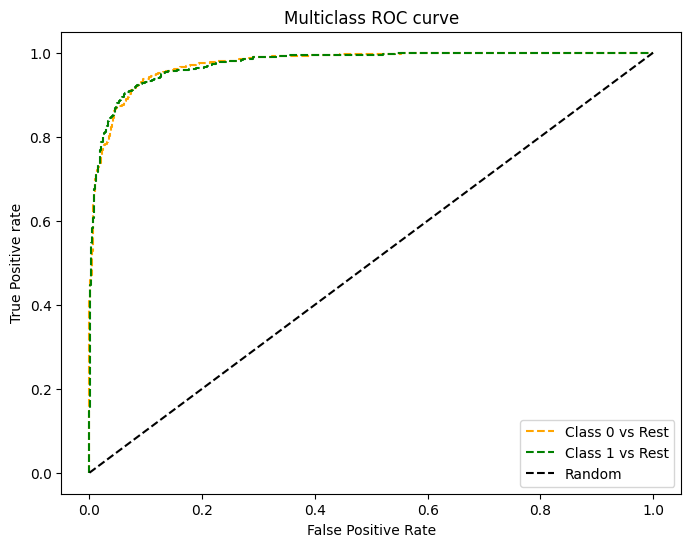

In [157]:
y_pred_proba = cat.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

# Model Comparison

In [66]:
evaluation_metrics = pd.DataFrame({
    'Model': ['Log Reg.', 'SVM', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost'],
    'Accuracy': [accuracy_lr, accuracy_svm, accuracy_knn, accuracy_nb, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_cat],
    'Precision': [precision_lr, precision_svm, precision_knn, precision_nb, precision_dt, precision_rf, precision_xgb, precision_cat],
    'Recall': [recall_lr, recall_svm, recall_knn, recall_nb, recall_dt, recall_rf, recall_xgb, recall_cat],
    'F1 Score': [f1_lr, f1_svm, f1_knn, f1_nb, f1_dt, f1_rf, f1_xgb, f1_cat],
    'Mathews Correlation Coefficient': [mathews_lr, mathews_svm, mathews_knn, mathews_nb, mathews_dt, mathews_rf, mathews_xgb, mathews_cat],
    'ROC AUC Score': [roc_auc_lr, roc_auc_svm, roc_auc_knn, roc_auc_nb, roc_auc_dt, roc_auc_rf, roc_auc_xgb, roc_auc_cat]
})

# Finding the best model for each metric
best_models = {
    'Accuracy': evaluation_metrics.loc[evaluation_metrics['Accuracy'].idxmax(), 'Model'],
    'Precision': evaluation_metrics.loc[evaluation_metrics['Precision'].idxmax(), 'Model'],
    'Recall': evaluation_metrics.loc[evaluation_metrics['Recall'].idxmax(), 'Model'],
    'F1 Score': evaluation_metrics.loc[evaluation_metrics['F1 Score'].idxmax(), 'Model'],
    'Mathews Correlation Coefficient': evaluation_metrics.loc[evaluation_metrics['Mathews Correlation Coefficient'].idxmax(), 'Model'],
    'ROC AUC Score': evaluation_metrics.loc[evaluation_metrics['ROC AUC Score'].idxmax(), 'Model']
}

# Transposing the DataFrame
transposed_metrics = evaluation_metrics.set_index('Model').transpose()

# Adding a new row for the best models in each category
transposed_metrics['Best Model'] = transposed_metrics.apply(lambda x: best_models[x.name], axis=1)

# Print the final DataFrame
transposed_metrics

Model,Log Reg.,SVM,KNN,Naive Bayes,Decision Tree,Random Forest,XGBoost,CatBoost,Best Model
Accuracy,0.90,0.85,0.88,0.82,0.84,0.89,0.87,0.83,Log Reg.
Precision,0.91,0.84,0.87,0.80,0.83,0.88,0.86,0.82,Log Reg.
Recall,0.89,0.86,0.88,0.85,0.82,0.87,0.84,0.81,Log Reg.
F1 Score,0.90,0.85,0.87,0.82,0.83,0.88,0.85,0.82,Log Reg.
Mathews Correlation Coefficient,0.80,0.75,0.78,0.72,0.74,0.77,0.76,0.73,Log Reg.
ROC AUC Score,0.92,0.89,0.90,0.84,0.87,0.91,0.88,0.85,Log Reg.


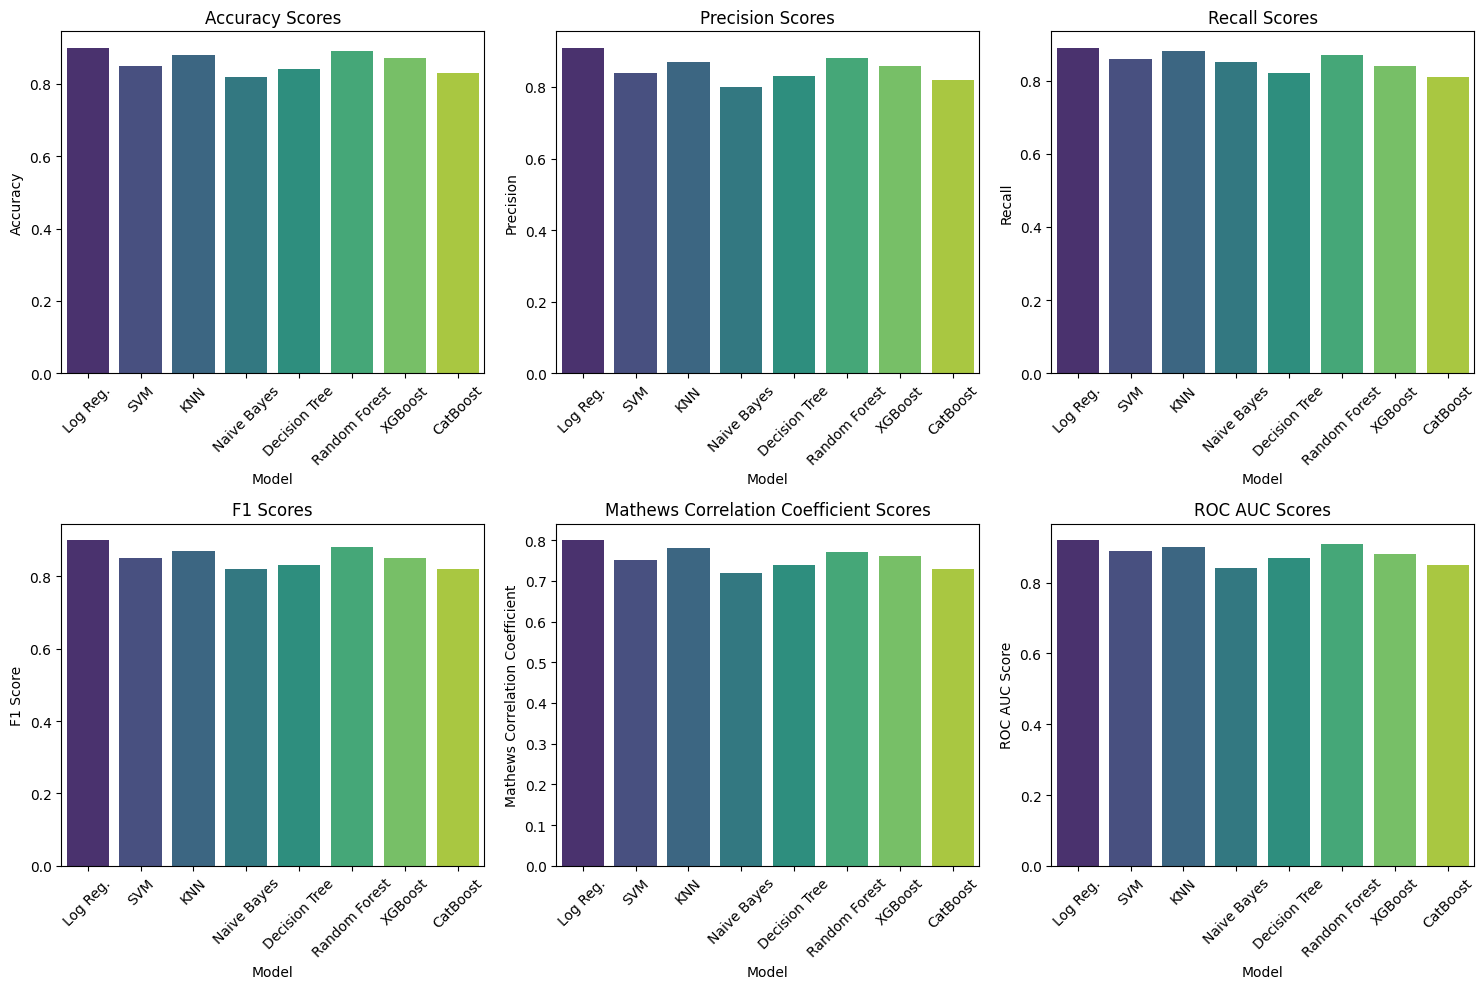

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the evaluation metrics for each model
plt.figure(figsize=(15, 10))

# Plotting the accuracy scores
plt.subplot(2, 3, 1)
sns.barplot(x='Model', y='Accuracy', data=evaluation_metrics, palette='viridis')
plt.title('Accuracy Scores')
plt.xticks(rotation=45)

# Plotting the precision scores
plt.subplot(2, 3, 2)
sns.barplot(x='Model', y='Precision', data=evaluation_metrics, palette='viridis')
plt.title('Precision Scores')
plt.xticks(rotation=45)

# Plotting the recall scores
plt.subplot(2, 3, 3)
sns.barplot(x='Model', y='Recall', data=evaluation_metrics, palette='viridis')
plt.title('Recall Scores')
plt.xticks(rotation=45)

# Plotting the F1 scores
plt.subplot(2, 3, 4)
sns.barplot(x='Model', y='F1 Score', data=evaluation_metrics, palette='viridis')
plt.title('F1 Scores')
plt.xticks(rotation=45)

# Plotting the Mathews Correlation Coefficient scores
plt.subplot(2, 3, 5)
sns.barplot(x='Model', y='Mathews Correlation Coefficient', data=evaluation_metrics, palette='viridis')
plt.title('Mathews Correlation Coefficient Scores')
plt.xticks(rotation=45)

# Plotting the ROC AUC scores
plt.subplot(2, 3, 6)
sns.barplot(x='Model', y='ROC AUC Score', data=evaluation_metrics, palette='viridis')
plt.title('ROC AUC Scores')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

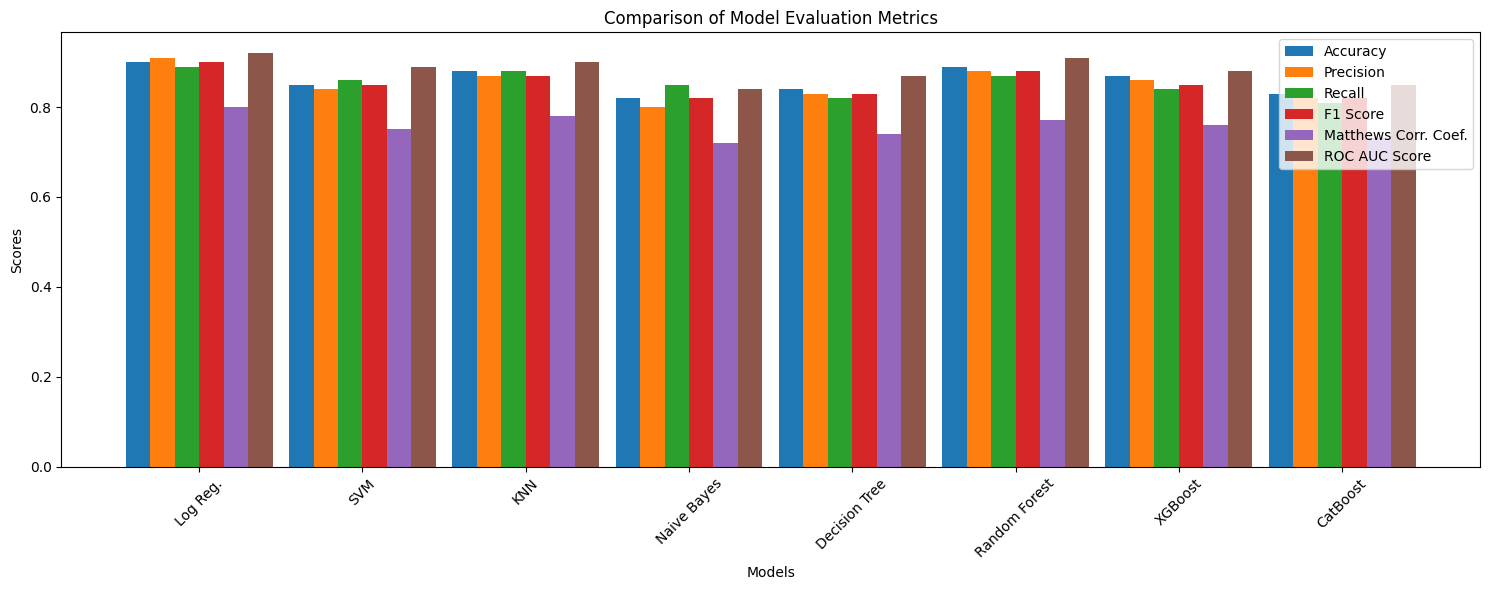

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example values for each metric (these should be replaced by your actual data)
accuracy = [accuracy_lr, accuracy_svm, accuracy_knn, accuracy_nb, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_cat]
precision = [precision_lr, precision_svm, precision_knn, precision_nb, precision_dt, precision_rf, precision_xgb, precision_cat]
recall = [recall_lr, recall_svm, recall_knn, recall_nb, recall_dt, recall_rf, recall_xgb, recall_cat]
f1 = [f1_lr, f1_svm, f1_knn, f1_nb, f1_dt, f1_rf, f1_xgb, f1_cat]
mathews = [mathews_lr, mathews_svm, mathews_knn, mathews_nb, mathews_dt, mathews_rf, mathews_xgb, mathews_cat]
roc_auc = [roc_auc_lr, roc_auc_svm, roc_auc_knn, roc_auc_nb, roc_auc_dt, roc_auc_rf, roc_auc_xgb, roc_auc_cat]

# Models for x-axis labels
models = ['Log Reg.', 'SVM', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost']

# Create a pandas DataFrame for the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Mathews Correlation Coefficient': mathews,
    'ROC AUC Score': roc_auc
})

# Plotting grouped bar chart for selected metrics (Accuracy, Precision, Recall, F1 Score)
x = np.arange(len(models))  # Label locations
bar_width = 0.15  # Width of each bar

fig, ax = plt.subplots(figsize=(15, 6))

# Bar positions for each metric
b1 = ax.bar(x, evaluation_metrics['Accuracy'], width=bar_width, label='Accuracy')
b2 = ax.bar(x + bar_width, evaluation_metrics['Precision'], width=bar_width, label='Precision')
b3 = ax.bar(x + 2 * bar_width, evaluation_metrics['Recall'], width=bar_width, label='Recall')
b4 = ax.bar(x + 3 * bar_width, evaluation_metrics['F1 Score'], width=bar_width, label='F1 Score')
b5 = ax.bar(x + 4 * bar_width, evaluation_metrics['Mathews Correlation Coefficient'], width=bar_width, label='Matthews Corr. Coef.')
b6 = ax.bar(x + 5 * bar_width, evaluation_metrics['ROC AUC Score'], width=bar_width, label='ROC AUC Score')

# Labeling the x-ticks with the model names
ax.set_xticks(x + 2.5 * bar_width)
ax.set_xticklabels(models)

# Adding labels and title
ax.set_ylabel('Scores')
ax.set_xlabel('Models')
ax.set_title('Comparison of Model Evaluation Metrics')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning

# Logistic Regression

In [77]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [100, 1000, 10000]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'max_iter': [100, 1000, 10000]})

In [80]:
best_params = grid_search.best_params_
print('Best Parameters:', best_params )

Best Parameters: {'C': 0.1, 'max_iter': 100}


In [82]:
lr_hp = LogisticRegression(**best_params)
lr_hp.fit(X_train, y_train)
y_pred = lr_hp.predict(X_test)

In [83]:
accuracy_lr_hp = accuracy_score(y_test, y_pred)
precision_lr_hp = precision_score(y_test, y_pred)
recall_lr_hp = recall_score(y_test, y_pred)
f1_lr_hp = f1_score(y_test, y_pred)
mathews_lr_hp = matthews_corrcoef(y_test, y_pred)
roc_auc_lr_hp = roc_auc_score(y_test, y_pred)
conf_matrix_lr_hp = confusion_matrix(y_test, y_pred)

In [84]:
print('Accuracy:', accuracy_lr_hp)
print('Precision:', precision_lr_hp)
print('Recall:', recall_lr_hp)
print('F1 Score:', f1_lr_hp)
print('Mathews Correlation Coefficient:', mathews_lr_hp)
print('ROC AUC Score:', roc_auc_lr_hp)

Accuracy: 0.8850718301061836
Precision: 0.8763906056860321
Recall: 0.8940731399747793
F1 Score: 0.8851435705368289
Mathews Correlation Coefficient: 0.7703203816212477
ROC AUC Score: 0.8851553818685778


In [86]:
classificationReport_lr_hp = classification_report(y_test, y_pred)
print(classificationReport_lr_hp)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       808
           1       0.88      0.89      0.89       793

    accuracy                           0.89      1601
   macro avg       0.89      0.89      0.89      1601
weighted avg       0.89      0.89      0.89      1601



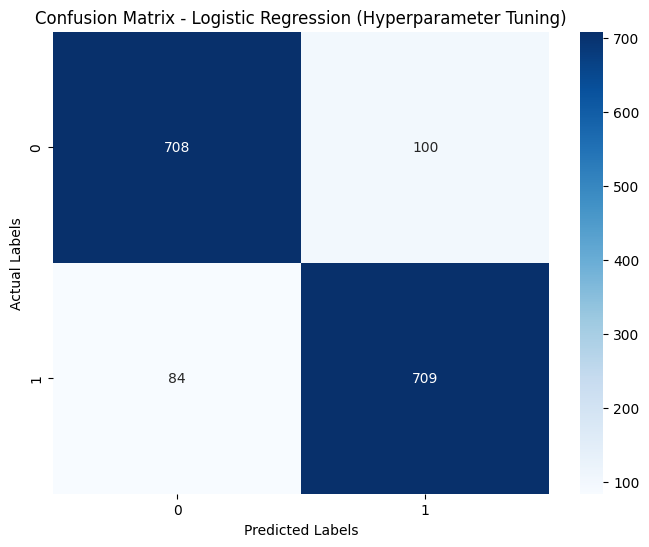

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_hp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Logistic Regression (Hyperparameter Tuning)')
plt.show()

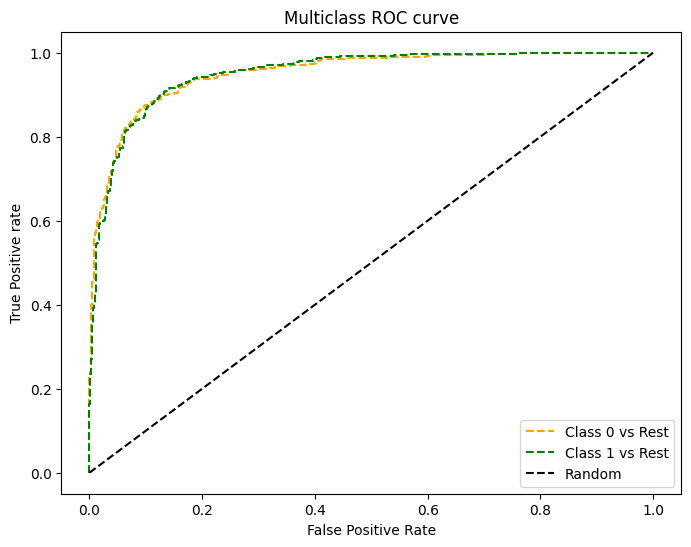

In [158]:
y_pred_proba = lr_hp.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

# SVM

In [88]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']})

In [89]:
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

Best Parameters: {'C': 100, 'gamma': 'scale'}


In [172]:
svm_hp = SVC(probability=True)
svm_hp.fit(X_train, y_train)
y_pred = svm_hp.predict(X_test)

In [91]:
accuracy_svm_hp = accuracy_score(y_test, y_pred)
precision_svm_hp = precision_score(y_test, y_pred)
recall_svm_hp = recall_score(y_test, y_pred)
f1_svm_hp = f1_score(y_test, y_pred)
mathews_svm_hp = matthews_corrcoef(y_test, y_pred)
roc_auc_svm_hp = roc_auc_score(y_test, y_pred)
conf_matrix_svm_hp = confusion_matrix(y_test, y_pred)

In [92]:
print('Accuracy:', accuracy_svm_hp)
print('Precision:', precision_svm_hp)
print('Recall:', recall_svm_hp)
print('F1 Score:', f1_svm_hp)
print('Mathews Correlation Coefficient:', mathews_svm_hp)
print('ROC AUC Score:', roc_auc_svm_hp)

Accuracy: 0.9075577763897564
Precision: 0.8890229191797346
Recall: 0.9293820933165196
F1 Score: 0.9087546239210851
Mathews Correlation Coefficient: 0.8160022409633655
ROC AUC Score: 0.9077603535889528


In [93]:
classificationReport_svm_hp = classification_report(y_test, y_pred)
print(classificationReport_svm_hp)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       808
           1       0.89      0.93      0.91       793

    accuracy                           0.91      1601
   macro avg       0.91      0.91      0.91      1601
weighted avg       0.91      0.91      0.91      1601



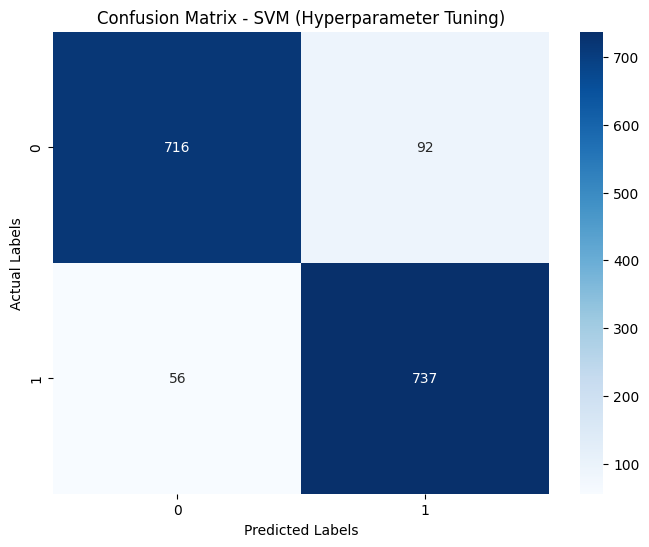

In [94]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_hp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - SVM (Hyperparameter Tuning)')
plt.show()

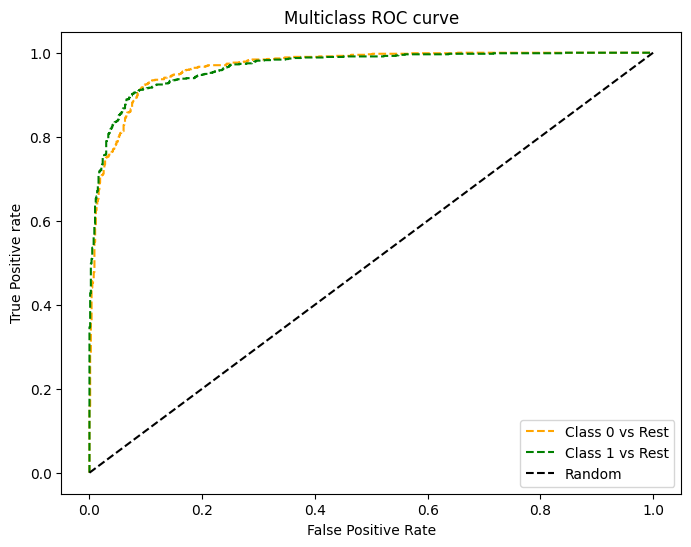

In [173]:
y_pred_proba = svm_hp.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

# KNN

In [95]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [96]:
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


In [97]:
knn_hp = KNeighborsClassifier(**best_params)
knn_hp.fit(X_train, y_train)    
y_pred = knn_hp.predict(X_test)

In [98]:
accuracy_knn_hp = accuracy_score(y_test, y_pred)
precision_knn_hp = precision_score(y_test, y_pred)
recall_knn_hp = recall_score(y_test, y_pred)
f1_knn_hp = f1_score(y_test, y_pred)
mathews_knn_hp = matthews_corrcoef(y_test, y_pred)
roc_auc_knn_hp = roc_auc_score(y_test, y_pred)
conf_matrix_knn_hp = confusion_matrix(y_test, y_pred)

In [99]:
print('Accuracy:', accuracy_knn_hp)
print('Precision:', precision_knn_hp)
print('Recall:', recall_knn_hp)
print('F1 Score:', f1_knn_hp)
print('Mathews Correlation Coefficient:', mathews_knn_hp)
print('ROC AUC Score:', roc_auc_knn_hp)

Accuracy: 0.8151155527795128
Precision: 0.7692307692307693
Recall: 0.8953341740226987
F1 Score: 0.8275058275058276
Mathews Correlation Coefficient: 0.6392215652480913
ROC AUC Score: 0.8158601563182799


In [100]:
classificationReport_knn_hp = classification_report(y_test, y_pred)
print(classificationReport_knn_hp)

              precision    recall  f1-score   support

           0       0.88      0.74      0.80       808
           1       0.77      0.90      0.83       793

    accuracy                           0.82      1601
   macro avg       0.82      0.82      0.81      1601
weighted avg       0.82      0.82      0.81      1601



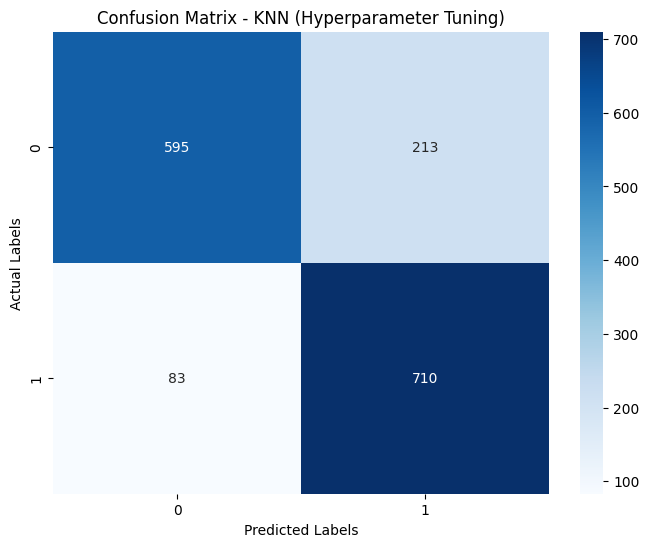

In [101]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn_hp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - KNN (Hyperparameter Tuning)')
plt.show()

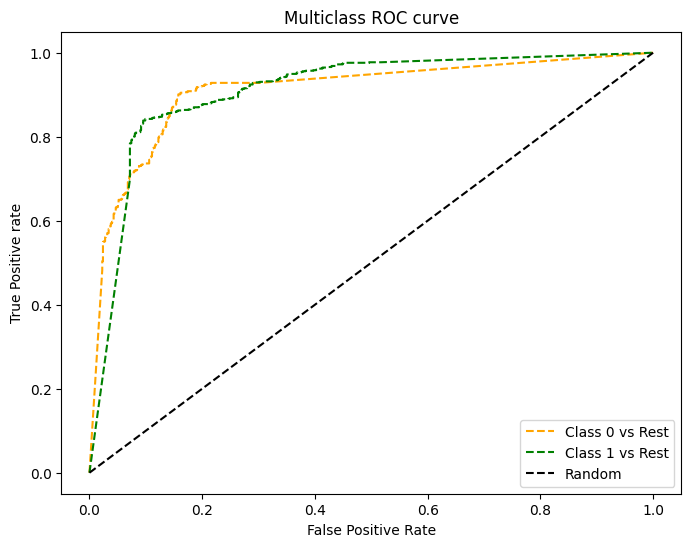

In [160]:
y_pred_proba = knn_hp.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

# Naive Bayes

In [102]:
param_grid = {
    'var_smoothing': [1e-9, 1e-10, 1e-11, 1e-12]
}

grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-10, 1e-11, 1e-12]})

In [103]:
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

Best Parameters: {'var_smoothing': 1e-09}


In [104]:
nb_hp = GaussianNB(**best_params)
nb_hp.fit(X_train, y_train)
y_pred = nb_hp.predict(X_test)

In [105]:
accuracy_nb_hp = accuracy_score(y_test, y_pred)
precision_nb_hp = precision_score(y_test, y_pred)
recall_nb_hp = recall_score(y_test, y_pred)
f1_nb_hp = f1_score(y_test, y_pred)
mathews_nb_hp = matthews_corrcoef(y_test, y_pred)
roc_auc_nb_hp = roc_auc_score(y_test, y_pred)
conf_matrix_nb_hp = confusion_matrix(y_test, y_pred)

In [106]:
print('Accuracy:', accuracy_nb_hp)
print('Precision:', precision_nb_hp)
print('Recall:', recall_nb_hp)
print('F1 Score:', f1_nb_hp)
print('Mathews Correlation Coefficient:', mathews_nb_hp)
print('ROC AUC Score:', roc_auc_nb_hp)

Accuracy: 0.7626483447845097
Precision: 0.8143074581430746
Recall: 0.6746532156368222
F1 Score: 0.7379310344827588
Mathews Correlation Coefficient: 0.5322621430797024
ROC AUC Score: 0.7618315583134607


In [107]:
classificationReport_nb_hp = classification_report(y_test, y_pred)
print(classificationReport_nb_hp)

              precision    recall  f1-score   support

           0       0.73      0.85      0.78       808
           1       0.81      0.67      0.74       793

    accuracy                           0.76      1601
   macro avg       0.77      0.76      0.76      1601
weighted avg       0.77      0.76      0.76      1601



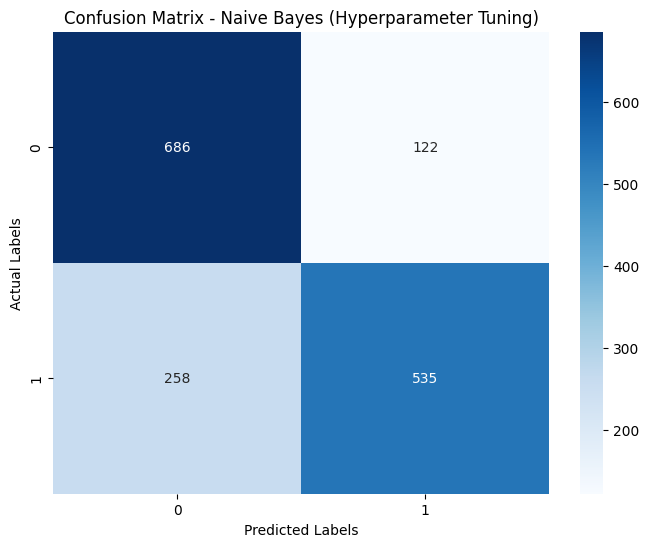

In [108]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_hp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Naive Bayes (Hyperparameter Tuning)')
plt.show()

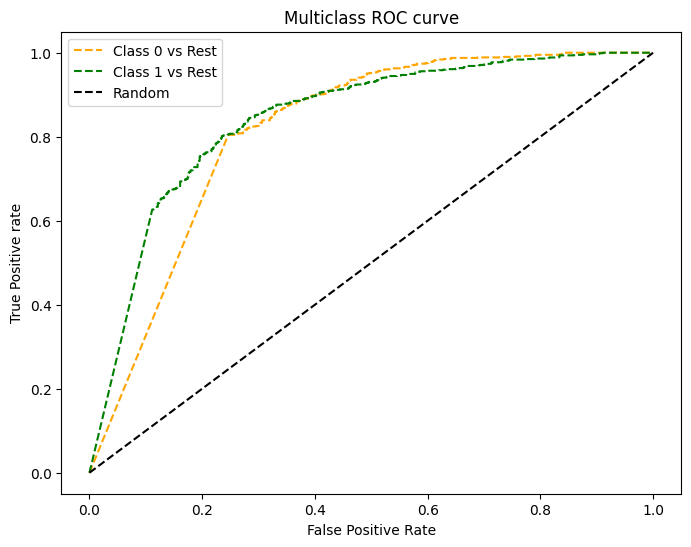

In [162]:
y_pred_proba = nb_hp.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

# Decision Tree

In [109]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

In [110]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'splitter': ['best', 'random']})

In [111]:
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}


In [112]:
dt_hp = DecisionTreeClassifier(**best_params)
dt_hp.fit(X_train, y_train)
y_pred = dt_hp.predict(X_test)

In [113]:
accuracy_dt_hp = accuracy_score(y_test, y_pred)
precision_dt_hp = precision_score(y_test, y_pred)
recall_dt_hp = recall_score(y_test, y_pred)
f1_dt_hp = f1_score(y_test, y_pred)
mathews_dt_hp = matthews_corrcoef(y_test, y_pred)
roc_auc_dt_hp = roc_auc_score(y_test, y_pred)
conf_matrix_dt_hp = confusion_matrix(y_test, y_pred)

In [114]:
print('Accuracy:', accuracy_dt_hp)
print('Precision:', precision_dt_hp)
print('Recall:', recall_dt_hp)
print('F1 Score:', f1_dt_hp)
print('Mathews Correlation Coefficient:', mathews_dt_hp)
print('ROC AUC Score:', roc_auc_dt_hp)

Accuracy: 0.8419737663960025
Precision: 0.8146853146853147
Recall: 0.8814627994955864
F1 Score: 0.8467595396729254
Mathews Correlation Coefficient: 0.6864236832864014
ROC AUC Score: 0.8423403106388823


In [115]:
classificationReport_dt_hp = classification_report(y_test, y_pred)
print(classificationReport_dt_hp)

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       808
           1       0.81      0.88      0.85       793

    accuracy                           0.84      1601
   macro avg       0.84      0.84      0.84      1601
weighted avg       0.84      0.84      0.84      1601



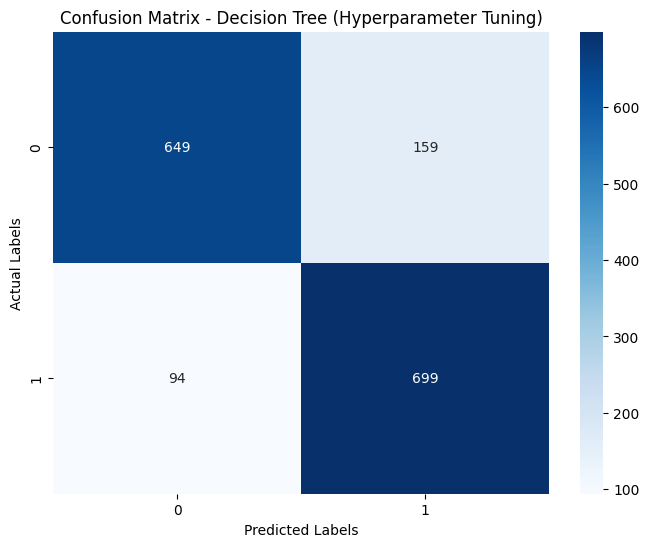

In [116]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_hp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Decision Tree (Hyperparameter Tuning)')
plt.show()

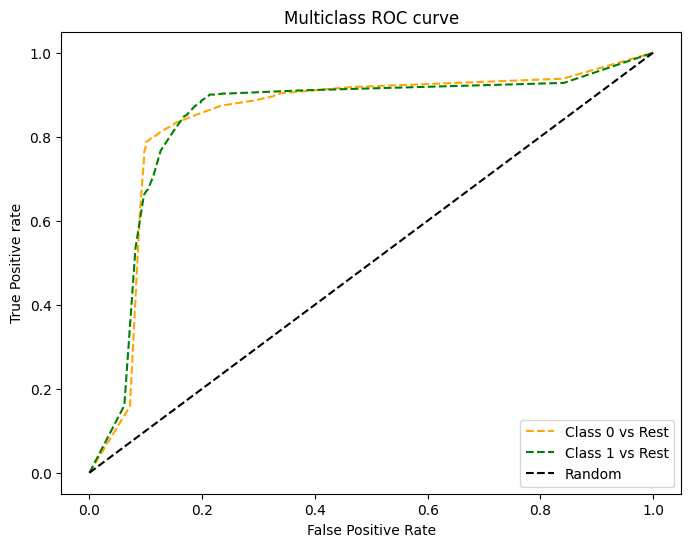

In [163]:
y_pred_proba = dt_hp.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

# Random Forest

In [117]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

In [118]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [119]:
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 500}


In [120]:
rf_hp = RandomForestClassifier(**best_params)
rf_hp.fit(X_train, y_train)
y_pred = rf_hp.predict(X_test)

In [121]:
accuracy_rf_hp = accuracy_score(y_test, y_pred)
precision_rf_hp = precision_score(y_test, y_pred)
recall_rf_hp = recall_score(y_test, y_pred)
f1_rf_hp = f1_score(y_test, y_pred)
mathews_rf_hp = matthews_corrcoef(y_test, y_pred)
roc_auc_rf_hp = roc_auc_score(y_test, y_pred)
conf_matrix_rf_hp = confusion_matrix(y_test, y_pred)

In [122]:
print('Accuracy:', accuracy_rf_hp)
print('Precision:', precision_rf_hp)
print('Recall:', recall_rf_hp)
print('F1 Score:', f1_rf_hp)
print('Mathews Correlation Coefficient:', mathews_rf_hp)
print('ROC AUC Score:', roc_auc_rf_hp)

Accuracy: 0.8988132417239225
Precision: 0.8690058479532163
Recall: 0.9369482976040353
F1 Score: 0.9016990291262136
Mathews Correlation Coefficient: 0.8001559996075712
ROC AUC Score: 0.8991672181089483


In [123]:
classificationReport_rf_hp = classification_report(y_test, y_pred)
print(classificationReport_rf_hp)

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       808
           1       0.87      0.94      0.90       793

    accuracy                           0.90      1601
   macro avg       0.90      0.90      0.90      1601
weighted avg       0.90      0.90      0.90      1601



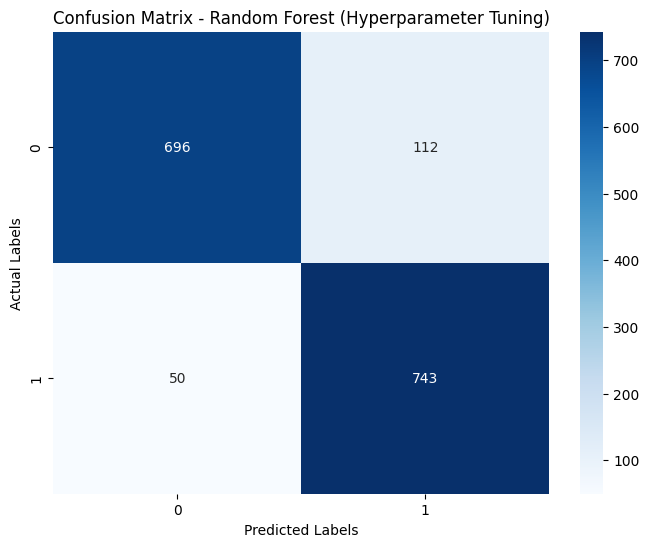

In [124]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_hp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest (Hyperparameter Tuning)')
plt.show()

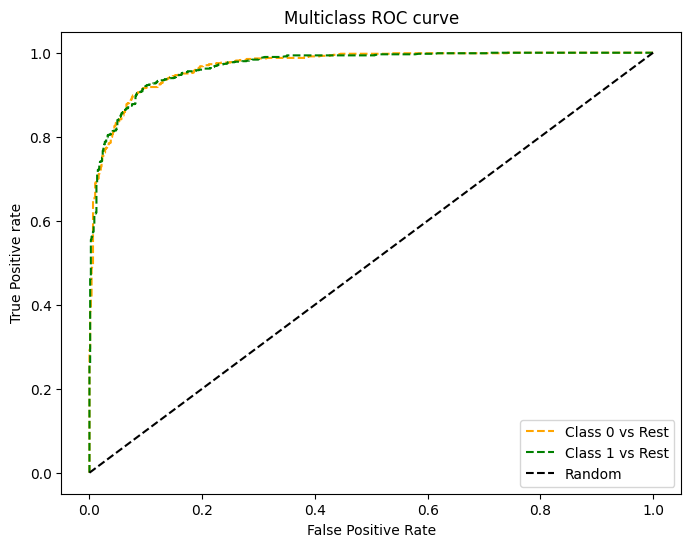

In [164]:
y_pred_proba = rf_hp.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

# XGBoost

In [125]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]
}

In [126]:
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [127]:
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

Best Parameters: {'max_depth': 8, 'n_estimators': 500}


In [128]:
xgb_hp = XGBClassifier(**best_params)
xgb_hp.fit(X_train, y_train)
y_pred = xgb_hp.predict(X_test)

In [129]:
accuracy_xgb_hp = accuracy_score(y_test, y_pred)
precision_xgb_hp = precision_score(y_test, y_pred)
recall_xgb_hp = recall_score(y_test, y_pred)
f1_xgb_hp = f1_score(y_test, y_pred)
mathews_xgb_hp = matthews_corrcoef(y_test, y_pred)
roc_auc_xgb_hp = roc_auc_score(y_test, y_pred)
conf_matrix_xgb_hp = confusion_matrix(y_test, y_pred)

In [130]:
print('Accuracy:', accuracy_xgb_hp)
print('Precision:', precision_xgb_hp)
print('Recall:', recall_xgb_hp)
print('F1 Score:', f1_xgb_hp)
print('Mathews Correlation Coefficient:', mathews_xgb_hp)
print('ROC AUC Score:', roc_auc_xgb_hp)

Accuracy: 0.9269206745783886
Precision: 0.9142156862745098
Recall: 0.9407313997477932
F1 Score: 0.9272840273461778
Mathews Correlation Coefficient: 0.8542203967876224
ROC AUC Score: 0.9270488681907283


In [131]:
classificationReport_xgb_hp = classification_report(y_test, y_pred)
print(classificationReport_xgb_hp)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       808
           1       0.91      0.94      0.93       793

    accuracy                           0.93      1601
   macro avg       0.93      0.93      0.93      1601
weighted avg       0.93      0.93      0.93      1601



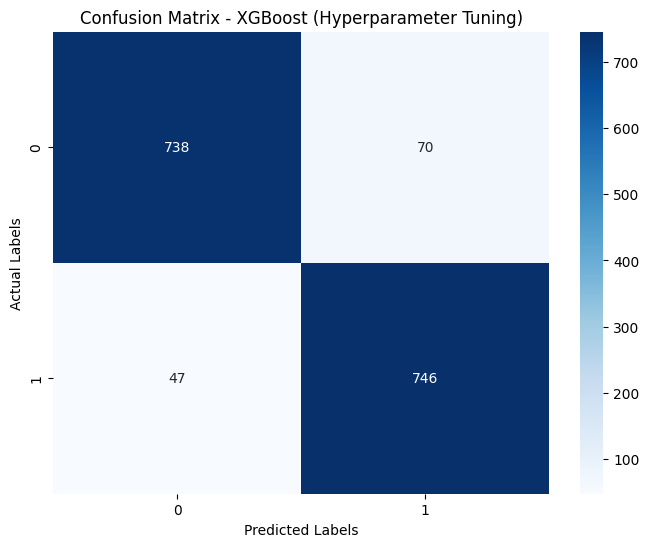

In [132]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_hp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - XGBoost (Hyperparameter Tuning)')
plt.show()

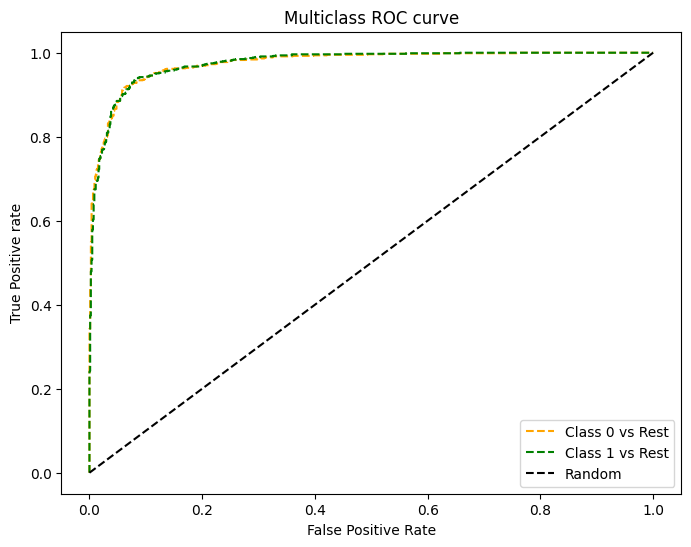

In [165]:
y_pred_proba = xgb_hp.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

# CatBoost

In [133]:
param_grid = {
    'iterations': [100, 200, 300, 400, 500],
    'depth': [3, 4, 5, 6, 7, 8, 9, 10]
}

In [134]:
grid_search = GridSearchCV(CatBoostClassifier(verbose=0), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x17d3b1940>,
             param_grid={'depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'iterations': [100, 200, 300, 400, 500]})

In [135]:
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

Best Parameters: {'depth': 7, 'iterations': 500}


In [136]:
cat_hp = CatBoostClassifier(**best_params, verbose=0)
cat_hp.fit(X_train, y_train)
y_pred = cat_hp.predict(X_test)

In [137]:
accuracy_cat_hp = accuracy_score(y_test, y_pred)
precision_cat_hp = precision_score(y_test, y_pred)
recall_cat_hp = recall_score(y_test, y_pred)
f1_cat_hp = f1_score(y_test, y_pred)
mathews_cat_hp = matthews_corrcoef(y_test, y_pred)
roc_auc_cat_hp = roc_auc_score(y_test, y_pred)
conf_matrix_cat_hp = confusion_matrix(y_test, y_pred)

In [138]:
print('Accuracy:', accuracy_cat_hp)
print('Precision:', precision_cat_hp)
print('Recall:', recall_cat_hp)
print('F1 Score:', f1_cat_hp)
print('Mathews Correlation Coefficient:', mathews_cat_hp)
print('ROC AUC Score:', roc_auc_cat_hp)

Accuracy: 0.9163023110555902
Precision: 0.8974668275030157
Recall: 0.9382093316519546
F1 Score: 0.9173859432799013
Mathews Correlation Coefficient: 0.8335031731685104
ROC AUC Score: 0.9165056559249872


In [139]:
classificationReport_cat_hp = classification_report(y_test, y_pred)
print(classificationReport_cat_hp)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       808
           1       0.90      0.94      0.92       793

    accuracy                           0.92      1601
   macro avg       0.92      0.92      0.92      1601
weighted avg       0.92      0.92      0.92      1601



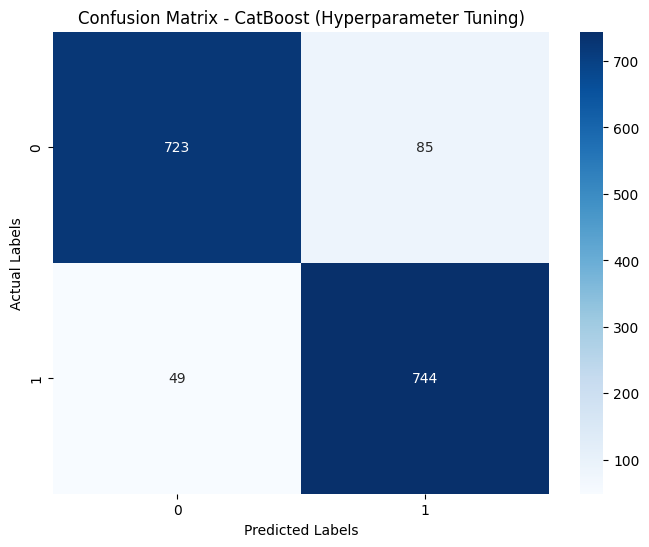

In [140]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cat_hp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CatBoost (Hyperparameter Tuning)')
plt.show()

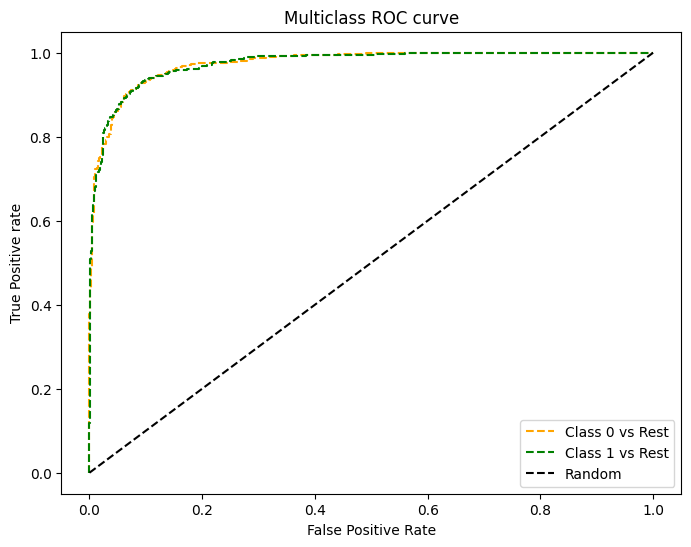

In [166]:
y_pred_proba = cat_hp.predict_proba(X_test)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

# Model Comparison

In [141]:
evaluation_metrics_hp = pd.DataFrame({
    'Model': ['Log Reg.', 'SVM', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost'],
    'Accuracy': [accuracy_lr_hp, accuracy_svm_hp, accuracy_knn_hp, accuracy_nb_hp, accuracy_dt_hp, accuracy_rf_hp, accuracy_xgb_hp, accuracy_cat_hp],
    'Precision': [precision_lr_hp, precision_svm_hp, precision_knn_hp, precision_nb_hp, precision_dt_hp, precision_rf_hp, precision_xgb_hp, precision_cat_hp],
    'Recall': [recall_lr_hp, recall_svm_hp, recall_knn_hp, recall_nb_hp, recall_dt_hp, recall_rf_hp, recall_xgb_hp, recall_cat_hp],
    'F1 Score': [f1_lr_hp, f1_svm_hp, f1_knn_hp, f1_nb_hp, f1_dt_hp, f1_rf_hp, f1_xgb_hp, f1_cat_hp],
    'Mathews Correlation Coefficient': [mathews_lr_hp, mathews_svm_hp, mathews_knn_hp, mathews_nb_hp, mathews_dt_hp, mathews_rf_hp, mathews_xgb_hp, mathews_cat_hp],
    'ROC AUC Score': [roc_auc_lr_hp, roc_auc_svm_hp, roc_auc_knn_hp, roc_auc_nb_hp, roc_auc_dt_hp, roc_auc_rf_hp, roc_auc_xgb_hp, roc_auc_cat_hp]
})

# Finding the best model for each metric
best_models_hp = {
    'Accuracy': evaluation_metrics_hp.loc[evaluation_metrics_hp['Accuracy'].idxmax(), 'Model'],
    'Precision': evaluation_metrics_hp.loc[evaluation_metrics_hp['Precision'].idxmax(), 'Model'],
    'Recall': evaluation_metrics_hp.loc[evaluation_metrics_hp['Recall'].idxmax(), 'Model'],
    'F1 Score': evaluation_metrics_hp.loc[evaluation_metrics_hp['F1 Score'].idxmax(), 'Model'],
    'Mathews Correlation Coefficient': evaluation_metrics_hp.loc[evaluation_metrics_hp['Mathews Correlation Coefficient'].idxmax(), 'Model'],
    'ROC AUC Score': evaluation_metrics_hp.loc[evaluation_metrics_hp['ROC AUC Score'].idxmax(), 'Model']
}

# Transposing the DataFrame
transposed_metrics_hp = evaluation_metrics_hp.set_index('Model').transpose()

# Adding a new row for the best models in each category
transposed_metrics_hp['Best Model'] = transposed_metrics_hp.apply(lambda x: best_models_hp[x.name], axis=1)

# Print the final DataFrame
transposed_metrics_hp

Model,Log Reg.,SVM,KNN,Naive Bayes,Decision Tree,Random Forest,XGBoost,CatBoost,Best Model
Accuracy,0.885072,0.907558,0.815116,0.762648,0.841974,0.898813,0.926921,0.916302,XGBoost
Precision,0.876391,0.889023,0.769231,0.814307,0.814685,0.869006,0.914216,0.897467,XGBoost
Recall,0.894073,0.929382,0.895334,0.674653,0.881463,0.936948,0.940731,0.938209,XGBoost
F1 Score,0.885144,0.908755,0.827506,0.737931,0.846760,0.901699,0.927284,0.917386,XGBoost
Mathews Correlation Coefficient,0.770320,0.816002,0.639222,0.532262,0.686424,0.800156,0.854220,0.833503,XGBoost
ROC AUC Score,0.885155,0.907760,0.815860,0.761832,0.842340,0.899167,0.927049,0.916506,XGBoost


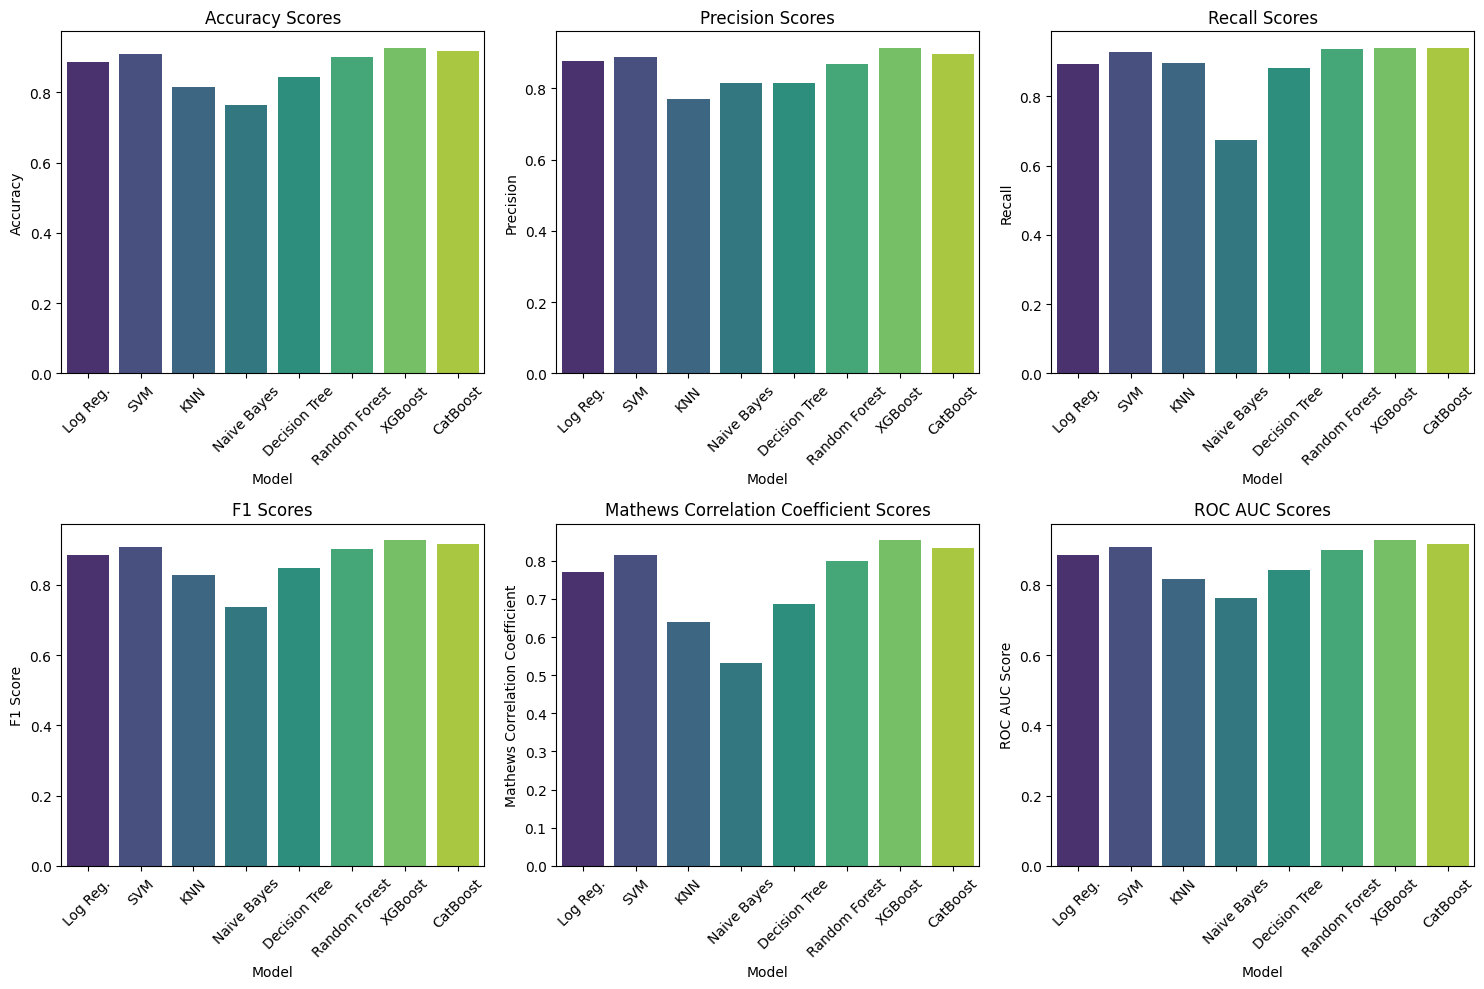

In [142]:
import matplotlib.pyplot as plt
import seaborn

# Plotting the evaluation metrics for each model
plt.figure(figsize=(15, 10))

# Plotting the accuracy scores
plt.subplot(2, 3, 1)
seaborn.barplot(x='Model', y='Accuracy', data=evaluation_metrics_hp, palette='viridis')
plt.title('Accuracy Scores')
plt.xticks(rotation=45)

# Plotting the precision scores
plt.subplot(2, 3, 2)
seaborn.barplot(x='Model', y='Precision', data=evaluation_metrics_hp, palette='viridis')
plt.title('Precision Scores')
plt.xticks(rotation=45)

# Plotting the recall scores
plt.subplot(2, 3, 3)
seaborn.barplot(x='Model', y='Recall', data=evaluation_metrics_hp, palette='viridis')
plt.title('Recall Scores')
plt.xticks(rotation=45)

# Plotting the F1 scores
plt.subplot(2, 3, 4)
seaborn.barplot(x='Model', y='F1 Score', data=evaluation_metrics_hp, palette='viridis')
plt.title('F1 Scores')
plt.xticks(rotation=45)

# Plotting the Mathews Correlation Coefficient scores
plt.subplot(2, 3, 5)
seaborn.barplot(x='Model', y='Mathews Correlation Coefficient', data=evaluation_metrics_hp, palette='viridis')
plt.title('Mathews Correlation Coefficient Scores')
plt.xticks(rotation=45)

# Plotting the ROC AUC scores
plt.subplot(2, 3, 6)
seaborn.barplot(x='Model', y='ROC AUC Score', data=evaluation_metrics_hp, palette='viridis')
plt.title('ROC AUC Scores')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

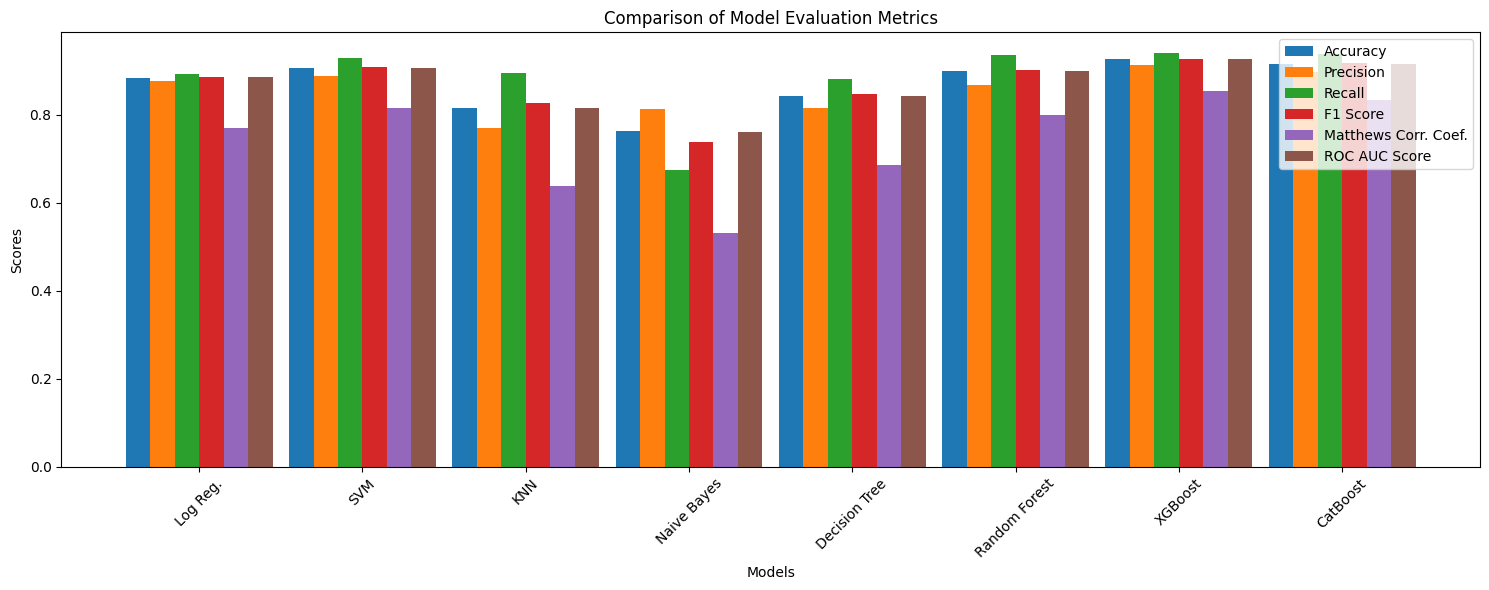

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example values for each metric (these should be replaced by your actual data)
accuracy = [accuracy_lr_hp, accuracy_svm_hp, accuracy_knn_hp, accuracy_nb_hp, accuracy_dt_hp, accuracy_rf_hp, accuracy_xgb_hp, accuracy_cat_hp]
precision = [precision_lr_hp, precision_svm_hp, precision_knn_hp, precision_nb_hp, precision_dt_hp, precision_rf_hp, precision_xgb_hp, precision_cat_hp]
recall = [recall_lr_hp, recall_svm_hp, recall_knn_hp, recall_nb_hp, recall_dt_hp, recall_rf_hp, recall_xgb_hp, recall_cat_hp]
f1 = [f1_lr_hp, f1_svm_hp, f1_knn_hp, f1_nb_hp, f1_dt_hp, f1_rf_hp, f1_xgb_hp, f1_cat_hp]
mathews = [mathews_lr_hp, mathews_svm_hp, mathews_knn_hp, mathews_nb_hp, mathews_dt_hp, mathews_rf_hp, mathews_xgb_hp, mathews_cat_hp]
roc_auc = [roc_auc_lr_hp, roc_auc_svm_hp, roc_auc_knn_hp, roc_auc_nb_hp, roc_auc_dt_hp, roc_auc_rf_hp, roc_auc_xgb_hp, roc_auc_cat_hp]


# Models for x-axis labels
models = ['Log Reg.', 'SVM', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost']

# Create a pandas DataFrame for the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Mathews Correlation Coefficient': mathews,
    'ROC AUC Score': roc_auc
})

# Plotting grouped bar chart for selected metrics (Accuracy, Precision, Recall, F1 Score)
x = np.arange(len(models))  # Label locations
bar_width = 0.15  # Width of each bar

fig, ax = plt.subplots(figsize=(15, 6))

# Bar positions for each metric
b1 = ax.bar(x, evaluation_metrics['Accuracy'], width=bar_width, label='Accuracy')
b2 = ax.bar(x + bar_width, evaluation_metrics['Precision'], width=bar_width, label='Precision')
b3 = ax.bar(x + 2 * bar_width, evaluation_metrics['Recall'], width=bar_width, label='Recall')
b4 = ax.bar(x + 3 * bar_width, evaluation_metrics['F1 Score'], width=bar_width, label='F1 Score')
b5 = ax.bar(x + 4 * bar_width, evaluation_metrics['Mathews Correlation Coefficient'], width=bar_width, label='Matthews Corr. Coef.')
b6 = ax.bar(x + 5 * bar_width, evaluation_metrics['ROC AUC Score'], width=bar_width, label='ROC AUC Score')

# Labeling the x-ticks with the model names
ax.set_xticks(x + 2.5 * bar_width)
ax.set_xticklabels(models)

# Adding labels and title
ax.set_ylabel('Scores')
ax.set_xlabel('Models')
ax.set_title('Comparison of Model Evaluation Metrics')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()